In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree
import pickle

In [2]:
# Load data from CSV
df = pd.read_csv("Churn_Modelling.csv")

#Display the CSV
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
# Define the features and target variables
X = df.drop(["Exited", "CustomerId","Surname","RowNumber","Geography","Gender"], axis=1)
y = df["Exited"]

In [4]:
#import pandas as pd
#from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical variables
#X = pd.get_dummies(X, columns=['Geography', 'Gender'])

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define the feature names
feature_names = list(X_train.columns)

In [7]:
# Create the Decision Tree Classifier model and fit it to the training data
dtc = DecisionTreeClassifier(random_state=42, max_features=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_features=5, random_state=42)

In [8]:
# Get the feature importances
importances = dtc.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(feature, importance)

CreditScore 0.15837501165155063
Age 0.20726039750679826
Tenure 0.08562016373462276
Balance 0.1524823516249497
NumOfProducts 0.15061009483795415
HasCrCard 0.01383083015039961
IsActiveMember 0.055497668442462136
EstimatedSalary 0.17632348205126283


In [9]:
# Serialize the model object using pickle
with open('dtc_modelNS.pkl', 'wb') as file:
    pickle.dump(dtc, file)

# Load the saved model object
with open('dtc_modelNS.pkl', 'rb') as file:
    dtc_loaded = pickle.load(file)

In [10]:
# Predict the target variable for the test data
y_pred = dtc.predict(X_test)

In [11]:
# Pass the feature names to the predict() method
test_data_with_names = pd.DataFrame(X_test, columns=feature_names)
predictions_with_names = dtc.predict(test_data_with_names)

In [12]:
# Print the predictions
print(predictions_with_names)

[0 0 0 ... 1 0 0]


In [13]:
# Print the confusion matrix and classification report for the model's performance on the test data
cm = confusion_matrix(y_test, predictions_with_names)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1388  219]
 [ 187  206]]


In [14]:
# Print the confusion matrix and classification report for the model's performance on the test data
print("\nClassification Report:\n", classification_report(y_test, predictions_with_names))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.48      0.52      0.50       393

    accuracy                           0.80      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [15]:
# Print the accuracy score for the model's performance on the test data
accuracy = accuracy_score(y_test, predictions_with_names)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.70%


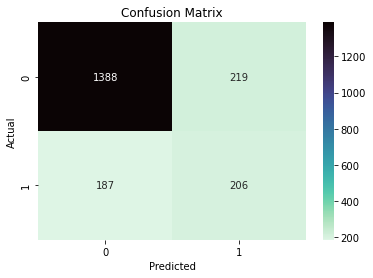

In [16]:
#Create a more visual Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(cm, annot=True, cmap='mako_r', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
## Tree Visualisation 
## Import the dependencies 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

# Create DOT data
dot_data = export_graphviz(
    dtc, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.476763 to fit



In [18]:
# Saving the tree as PDF
file_path = ("Bank_tree2.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Bank_tree2.png")
graph.write_png(file_path)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.476763 to fit



True

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_text
import json

# export the decision tree as a text representation
tree_text = export_text(dtc, feature_names=list(X_train.columns))

# convert the text representation to a JSON object
tree_dict = {}
for line in tree_text.split('\n'):
    if line.startswith(('|', ' ')):
        node = line.count('|') - 1
        if node not in tree_dict:
            tree_dict[node] = []
        tree_dict[node].append(line.strip())
    elif line.startswith('['):
        tree_dict[node].append(line.strip())
        
# save the JSON object to a file
with open('tree2.json', 'w') as outfile:
    json.dump(tree_dict, outfile)

In [20]:
import numpy as np

# Age, CreditScore, Tenure, Balance, NumofProducts, HasCrCard, IsActiveMember, EstimatedSalary
input_data = np.array([[30, 600, 5, 10000, 1, 1, 1, 50000]])

# Make a prediction using the trained decision tree model
prediction = dtc.predict(input_data)

# Print the predicted churn status for the input customer
if prediction == 1:
    print("This customer is likely to churn.")
else:
    print("This customer is not likely to churn.")
    
# Get the probability of each class (churn or not churn) for the input customer
probabilities = dtc.predict_proba(input_data)

# Print the probability of churn for the input customer
churn_prob = probabilities[0, 1]
print("The probability of churn for this customer is:", churn_prob)

This customer is not likely to churn.
The probability of churn for this customer is: 0.0


C:\Users\L_Mul\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\L_Mul\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
